In [ ]:
!pip install "dask[dataframe]" --quiet
import dask.dataframe as dd
import pandas as pd
import numpy as np

In [ ]:
rows = 100000  # 1 lakh rows = big dataset for demo
import pandas as pd, numpy as np

data = pd.DataFrame({
    "transaction_id": np.arange(1, rows+1),
    "user_id": np.random.randint(1, 5000, size=rows),
    "amount": np.random.normal(200, 50, size=rows).round(2),
    "category": np.random.choice(["Grocery","Electronics","Fashion","Fuel","Health"], size=rows),
})
data.to_csv("transactions.csv", index=False)
print("✅ Sample data created:", len(data), "rows")

✅ Sample data created: 100000 rows


In [ ]:
import dask.dataframe as dd

df = dd.read_csv("transactions.csv")
df.head()  # preview first rows

,transaction_id,user_id,amount,category
0,1,3682,132.67,Electronics
1,2,4797,173.89,Fuel
2,3,853,147.38,Fashion
3,4,2426,89.62,Health
4,5,3389,184.05,Fuel


In [ ]:
# Drop missing values (safety) and enforce numeric type
df = df.dropna(subset=["amount", "category"])
df["amount"] = df["amount"].astype(float)

In [ ]:
# Transactions count, average amount, and total amount by category
summary = df.groupby("category").agg({
    "transaction_id": "count",
    "amount": ["mean", "sum"]
}).compute()

# Tidy column names
summary.columns = ["Transactions", "Average_Amount", "Total_Amount"]
summary = summary.sort_values("Transactions", ascending=False)
summary

,Transactions,Average_Amount,Total_Amount
category,,,
Fashion,20352,199.965108,4069689.88
Fuel,20255,200.289228,4056858.32
Health,19820,199.560817,3955295.40
Grocery,19792,199.957055,3957550.03
Electronics,19781,199.953820,3955286.52


In [ ]:
# Top 10 users by total spend
top_users = df.groupby("user_id")["amount"].sum().nlargest(10).compute()
top_users

,amount
user_id,
1512,8030.72
4170,7461.63
713,7368.81
4886,7345.55
481,7269.49
369,7233.17
4995,7097.09
3539,6993.16
359,6982.54


In [ ]:
summary.to_csv("Category_Summary.csv")
top_users.to_csv("TopUsers.csv")
print("✅ Exported: Category_Summary.csv, TopUsers.csv")

✅ Exported: Category_Summary.csv, TopUsers.csv


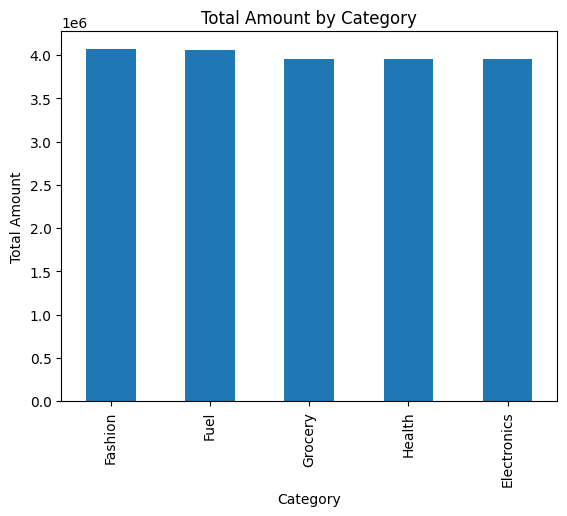

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for category totals
summary_plot = summary.sort_values("Total_Amount", ascending=False)
summary_plot["Total_Amount"].plot(kind="bar")
plt.title("Total Amount by Category")
plt.xlabel("Category")
plt.ylabel("Total Amount")
plt.show()